In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data_folder = "../qa_predictions/20_total_documents/"
gpt_folders = ["gpt", "gpt_reordered", "gpt_tot"]
llama_7b_folders = ["llama", "llama_reordered", "llama_COT", "llama_tot", "llama_mapreduce"]
llama_70b_folders = ["llama_70b", "llama_70b_reordered", "llama_70b_COT"]
all_models = gpt_folders + llama_7b_folders + llama_70b_folders
res_file = "/original_position_scores.csv"

uncertainity_folders = gpt_folders + llama_7b_folders[:-1] + llama_70b_folders
uncertainity_files = "/original_position_scores_uncertainity.csv" 

In [57]:
all_files = [data_folder + f + res_file for f in all_models]
uncertainity_files = [data_folder + f + uncertainity_files for f in uncertainity_folders]

In [58]:
dfs = []
for csv in all_files:
    df = pd.read_csv(csv).rename(columns={"metric": csv[:-4]})
    dfs.append(df)

In [59]:
df = pd.concat(dfs[:-(len(uncertainity_files))], axis=1)

In [60]:
df.head()

,position,../qa_predictions/20_total_documents/gpt/original_position_scores
0,0,0.846328
1,4,0.729567
2,9,0.668550
3,14,0.530320
4,19,0.694162


In [62]:
# Combine all dataframes as columns
df = pd.concat(dfs, axis=1)
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]
# Renave columns with path names
df.columns = [c.split("/")[-2] if "/" in c else c for c in df.columns]


In [63]:
df.head()

,position,gpt,gpt_reordered,gpt_tot,llama,llama_reordered,llama_COT,llama_tot,llama_mapreduce,llama_70b,llama_70b_reordered,llama_70b_COT
0,0,0.846328,0.813183,0.738606,0.602260,0.611299,0.653861,0.578908,0.486252,0.682486,0.604520,0.705838
1,4,0.729567,0.711488,0.651977,0.522787,0.419962,0.503202,0.542750,0.442185,0.549153,0.716008,0.655744
2,9,0.668550,0.679096,0.621846,0.428625,0.509981,0.487382,0.578531,0.466290,0.560829,0.633522,0.593974
3,14,0.530320,0.702448,0.576648,0.433522,0.447458,0.500942,0.555556,0.475330,0.601130,0.582674,0.654614
4,19,0.694162,0.668550,0.614313,NaN,0.417326,NaN,0.619209,0.505461,0.685122,0.653107,0.675706


Text(0.5, 1.0, 'Accuracy of QA predictions by position on 20 documents')

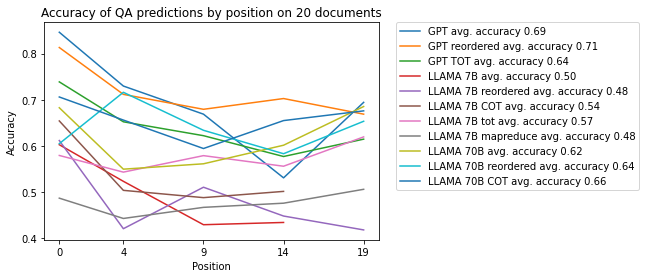

In [42]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["GPT", "GPT reordered", "GPT TOT","LLAMA 7B", "LLAMA 7B reordered", "LLAMA 7B COT", "LLAMA 7B tot", "LLAMA 7B mapreduce", "LLAMA 70B", "LLAMA 70B reordered", "LLAMA 70B COT"]
columns = ["gpt", "gpt_reordered","gpt_tot", "llama", "llama_reordered", "llama_COT", "llama_tot", "llama_mapreduce", "llama_70b", "llama_70b_reordered", "llama_70b_COT"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")

Text(0.5, 1.0, 'Accuracy of QA predictions by position on 20 documents')

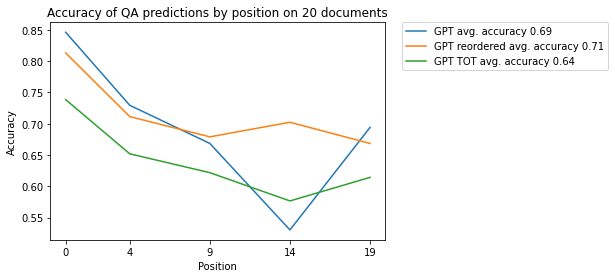

In [8]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["GPT", "GPT reordered", "GPT TOT"]
columns = ["gpt", "gpt_reordered", "gpt_tot"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")

Text(0.5, 1.0, 'Accuracy of QA predictions by position on 20 documents')

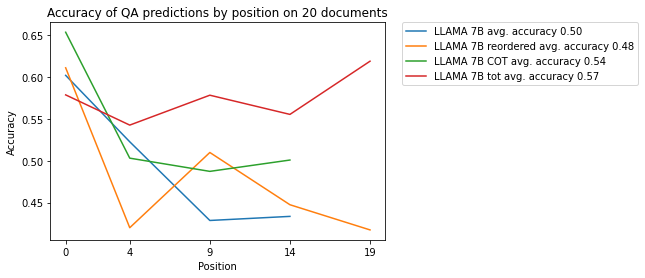

In [9]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["LLAMA 7B", "LLAMA 7B reordered", "LLAMA 7B COT", "LLAMA 7B tot"]
columns = ["llama", "llama_reordered", "llama_COT", "llama_tot"]
positions = df["position"]  
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")

Text(0.5, 1.0, 'Accuracy of QA predictions by position on 20 documents')

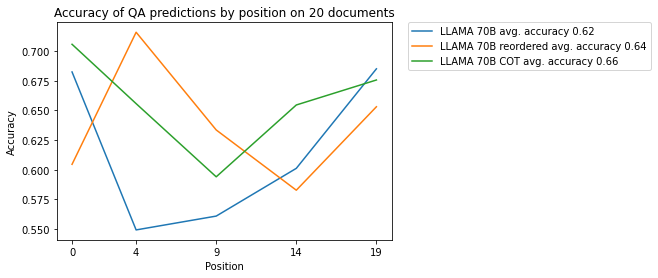

In [10]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["LLAMA 70B", "LLAMA 70B reordered", "LLAMA 70B COT"]
columns = ["llama_70b", "llama_70b_reordered", "llama_70b_COT"]
positions = df["position"]  
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")

In [11]:
# implement a fuction to measure drawdown
def drawdown(df, col):
    """Drawdown is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained.
    """
    df["local_min"] = df[col].cummin()
    df["drawdown"] = df[col] - df["local_min"]
    # keep only the maximum drawdown at each point
    # df["max_drawdown"] = df["drawdown"].cummax()
    # return df["max_drawdown"]
    return df["drawdown"]

In [12]:
df.head()

,position,gpt,gpt_reordered,gpt_tot,llama,llama_reordered,llama_COT,llama_tot,llama_mapreduce,llama_70b,llama_70b_reordered,llama_70b_COT
0,0,0.846328,0.813183,0.738606,0.602260,0.611299,0.653861,0.578908,0.486252,0.682486,0.604520,0.705838
1,4,0.729567,0.711488,0.651977,0.522787,0.419962,0.503202,0.542750,0.442185,0.549153,0.716008,0.655744
2,9,0.668550,0.679096,0.621846,0.428625,0.509981,0.487382,0.578531,0.466290,0.560829,0.633522,0.593974
3,14,0.530320,0.702448,0.576648,0.433522,0.447458,0.500942,0.555556,0.475330,0.601130,0.582674,0.654614
4,19,0.694162,0.668550,0.614313,NaN,0.417326,NaN,0.619209,0.505461,0.685122,0.653107,0.675706


In [13]:
drawdown(df, "gpt")

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.163842
Name: drawdown, dtype: float64

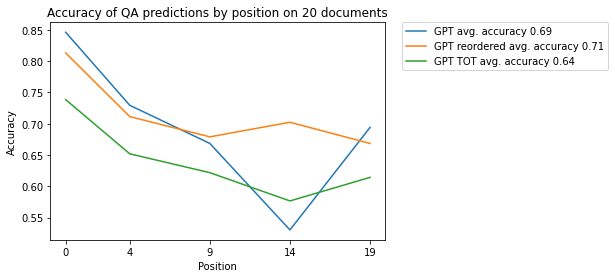

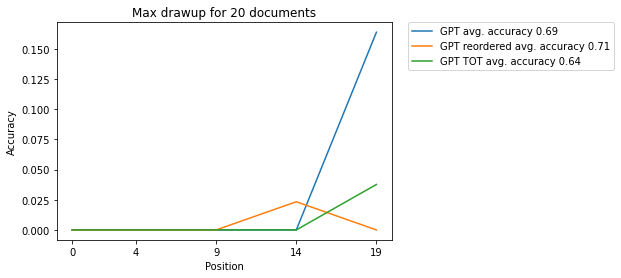

In [14]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["GPT", "GPT reordered", "GPT TOT"]
columns = ["gpt", "gpt_reordered", "gpt_tot"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")
plt.show()

for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, drawdown(df, columns[i]), label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Max drawup for 20 documents")
plt.show()

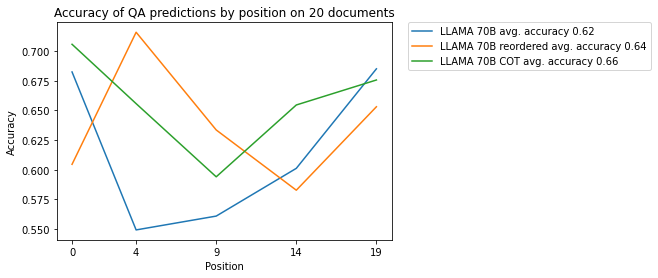

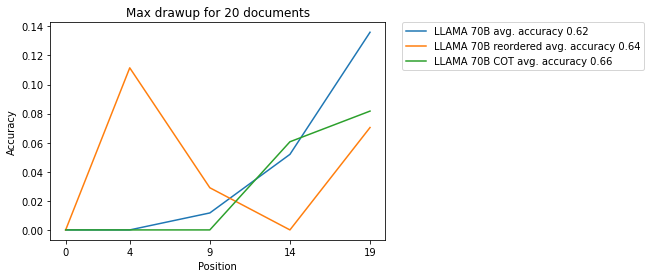

In [15]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["LLAMA 70B", "LLAMA 70B reordered", "LLAMA 70B COT"]
columns = ["llama_70b", "llama_70b_reordered", "llama_70b_COT"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")
plt.show()

for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, drawdown(df, columns[i]), label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Max drawup for 20 documents")
plt.show()

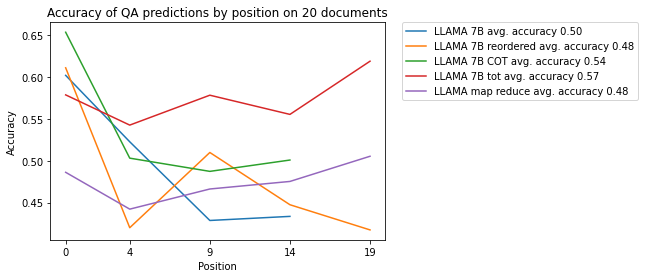

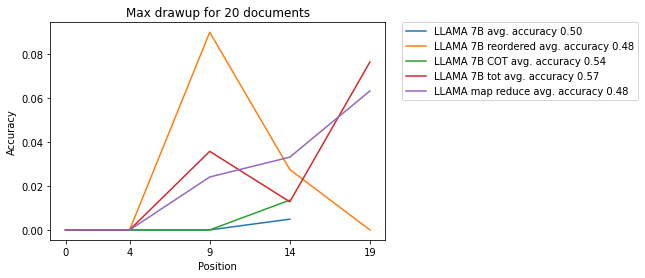

In [16]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["LLAMA 7B", "LLAMA 7B reordered", "LLAMA 7B COT", "LLAMA 7B tot", "LLAMA map reduce"]
columns = ["llama", "llama_reordered", "llama_COT", "llama_tot", "llama_mapreduce"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")
plt.show()

for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, drawdown(df, columns[i]), label=f"{name} avg. accuracy {avg_acc:.2f}")
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Max drawup for 20 documents")
plt.show()

# Uncertainities

In [64]:
dfs = []
for csv in all_files:
    df = pd.read_csv(csv).rename(columns={"metric": csv[:-4]})
    dfs.append(df)

In [79]:
import seaborn as sns

,position,metric,lower_bound,upper_bound
0,0,0.846328,0.832392,0.860461
1,4,0.729567,0.712241,0.746516
2,9,0.668550,0.650094,0.686629
3,14,0.530320,0.511111,0.549153
4,19,0.694162,0.677213,0.711685


,position,metric,lower_bound,upper_bound
0,0,0.823129,0.784580,0.859410
1,4,0.711488,0.694162,0.728437
2,9,0.679096,0.661394,0.696422
3,14,0.702448,0.685122,0.720151
4,19,0.668550,0.650847,0.686629


,position,metric,lower_bound,upper_bound
0,0,0.738606,0.722034,0.754802
1,4,0.651977,0.633898,0.669501
2,9,0.621846,0.602637,0.639925
3,14,0.576648,0.557815,0.595104
4,19,0.614313,0.595480,0.632392


,position,metric,lower_bound,upper_bound
0,0,0.602260,0.583427,0.620716
1,4,0.522787,0.503955,0.542373
2,9,0.428625,0.409793,0.447458
3,14,0.433522,0.414689,0.452354
4,19,0.522787,0.502448,0.541996


,position,metric,lower_bound,upper_bound
0,0,0.611299,0.592467,0.629200
1,4,0.419962,0.401507,0.438418
2,9,0.509981,0.491149,0.528814
3,14,0.447458,0.429379,0.466667
4,19,0.417326,0.398672,0.436535


,position,metric,lower_bound,upper_bound
0,0,0.653861,0.635960,0.672693
1,4,0.503202,0.483616,0.522411
2,9,0.487382,0.468927,0.505461
3,14,0.500942,0.482486,0.520151


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

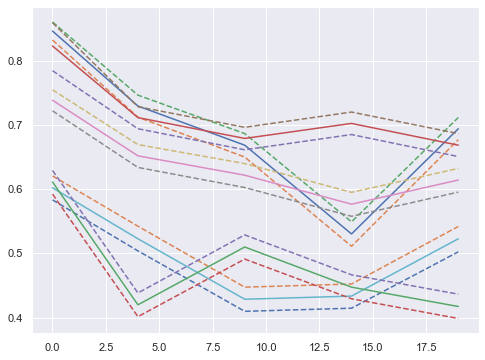

In [86]:
# Initialize seaborn plot
sns.set_theme(style="darkgrid")
# Initialize matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Plot the data
for csv in uncertainity_files:
    df = pd.read_csv(csv)
    name = csv.split("/")[-2]
    display(df)
    lb = np.array([float(x) for x in df["lower_bound"]])
    ub = np.array([float(x) for x in df["upper_bound"]])
    acc = df["metric"]
    # plot with sns
    plt.plot(positions, acc, label=name)
    plt.plot(positions, lb, label=f"{name} lower bound", linestyle="--")
    plt.plot(positions, ub, label=f"{name} upper bound", linestyle="--")
    

# position legend outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [48]:
# Combine all dataframes as columns
df = pd.concat(dfs, axis=1)
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]
# Renave columns with path names
df.columns = [c.split("/")[-2] if "/" in c else c for c in df.columns]


,position,../qa_predictions/20_total_documents/gpt/original_position_scores_uncertainity,lower_bound,upper_bound
0,0,0.846328,0.832392,0.860461
1,4,0.729567,0.712241,0.746516
2,9,0.668550,0.650094,0.686629
3,14,0.530320,0.511111,0.549153
4,19,0.694162,0.677213,0.711685


In [ ]:
df = pd.concat(dfs[:-(len(uncertainity_files))], axis=1)
# Combine all dataframes as columns
df = pd.concat(dfs, axis=1)
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]
# Renave columns with path names
df.columns = [c.split("/")[-2] if "/" in c else c for c in df.columns]


In [ ]:
# Plot results with position on x-axis and accuracy score on y-axis.

names = ["GPT", "GPT reordered", "GPT TOT","LLAMA 7B", "LLAMA 7B reordered", "LLAMA 7B COT", "LLAMA 7B tot", "LLAMA 7B mapreduce", "LLAMA 70B", "LLAMA 70B reordered", "LLAMA 70B COT"]
columns = ["gpt", "gpt_reordered","gpt_tot", "llama", "llama_reordered", "llama_COT", "llama_tot", "llama_mapreduce", "llama_70b", "llama_70b_reordered", "llama_70b_COT"]
positions = df["position"]
for i, name in enumerate(names):
    avg_acc = df[columns[i]].mean()
    plt.plot(positions, df[columns[i]], label=f"{name} avg. accuracy {avg_acc:.2f}")
    plt.plot(positions, df)
plt.xlabel("Position")
plt.ylabel("Accuracy")
plt.xticks(positions)
# position legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy of QA predictions by position on 20 documents")

In [71]:
import numpy as np

In [85]:
np.version.version

'1.24.0'